In [201]:
# Access Libraries 
import numpy as np 
import scipy as sp
import pandas as pd 
import seaborn as sb 

import matplotlib.pyplot as plt
import sklearn 

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

In [202]:
# Allow visualizations 
%matplotlib inline 
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')

# Goal: Create prediction models for survival on Titanic

In [203]:
testData = pd.read_csv("C:\\Users\\loret\\Desktop\\DataSciencePrep\\Kaggle\\Titanic\\test.csv")
# testData.tail(50)
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [204]:
trainData = pd.read_csv("C:\\Users\\loret\\Desktop\\DataSciencePrep\\Kaggle\\Titanic\\train.csv")
trainData.head()
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [205]:
testData.shape

(418, 11)

In [206]:
testData.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [207]:
trainData.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [208]:
# Drop cabin colum
testData = testData.drop(['Cabin'], 1)
trainData = trainData.drop(['Cabin'], 1)

In [209]:
testData.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [210]:
trainData.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

### Create Function to Replace Nulls in Age

In [211]:
testData['Age'].groupby(testData['Pclass']).describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,98.0,40.918367,13.956799,6.00,30.0,42.0,50.75,76.0
2,88.0,28.777500,12.943458,0.92,21.0,26.5,35.25,63.0
3,146.0,24.027945,10.537105,0.17,18.5,24.0,29.75,60.5


In [212]:
# Make replacements for null values using the median
def approx_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 42
        elif Pclass == 2:
            return 26.5 
        else:
            return 24 
    else: 
        return Age 

In [213]:
# Apply function
testData['Age'] = testData[['Age', 'Pclass']].apply(approx_age, axis=1)

In [214]:
# Check to see if nulls still there 
# Note: after fixing function, nulls no longer there 
testData['Age'].isnull().any()

False

In [215]:
testData.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [216]:
# Get rid of the nulls in the Age variable by applying the same function 
trainData['Age'] = trainData[['Age', 'Pclass']].apply(approx_age, axis=1)

In [217]:
trainData['Age'].isnull().any()

False

In [218]:
trainData.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [169]:
# Make copy of test dataset 
cc = testData.copy()

In [170]:
cc.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


### Swap Categorical Variables with Dummy Indicators

### Create Dummy Variables

In [231]:
# Change embarked and pclass from categorical to 0/1 dummy indicators
# Try on copy dataset 
sex1 = pd.get_dummies(cc['Sex'], drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [220]:
# Do to real test & train datasets 
sex = pd.get_dummies(testData['Sex'], drop_first=True)

In [238]:
# Create dummy for train dataset
sex2 = pd.get_dummies(trainData['Sex'], drop_first=True)

In [232]:
embark1 = pd.get_dummies(cc['Embarked'], drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [239]:
# Create for train and test datasets 
# embark = pd.get_dummies(testData['Embarked'], drop_first=True)
embark2 = pd.get_dummies(trainData['Embarked'], drop_first=True)

In [224]:
testData.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

### Apply new dummie values 

In [225]:
# Reviewing to see if there are any null values 
cc.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [226]:
cc.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [179]:
len(cc)

418

### Drop & Swap

In [233]:
testingDatadummy = cc.drop(['Sex','Embarked'], 1)
# Drop variables from real test dataset
#testDatadummy = testData.drop(['Sex', 'Embarked'], 1)

In [234]:
testingDatadummy.tail()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare
413,1305,3,"Spector, Mr. Woolf",24.0,0,0,A.5. 3236,8.0500
414,1306,1,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000
415,1307,3,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500
416,1308,3,"Ware, Mr. Frederick",24.0,0,0,359309,8.0500
417,1309,3,"Peter, Master. Michael J",24.0,1,1,2668,22.3583


In [191]:
testDatadummy.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
dtype: int64

In [189]:
testDatadummy.tail(50)

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare
368,1260,1,"Gibson, Mrs. Leonard (Pauline C Boeson)",45.0,0,1,112378,59.4000
369,1261,2,"Pallas y Castello, Mr. Emilio",29.0,0,0,SC/PARIS 2147,13.8583
370,1262,2,"Giles, Mr. Edgar",21.0,1,0,28133,11.5000
371,1263,1,"Wilson, Miss. Helen Alice",31.0,0,0,16966,134.5000
372,1264,1,"Ismay, Mr. Joseph Bruce",49.0,0,0,112058,0.0000
373,1265,2,"Harbeck, Mr. William H",44.0,0,0,248746,13.0000
374,1266,1,"Dodge, Mrs. Washington (Ruth Vidaver)",54.0,1,1,33638,81.8583
375,1267,1,"Bowen, Miss. Grace Scott",45.0,0,0,PC 17608,262.3750
376,1268,3,"Kink, Miss. Maria",22.0,2,0,315152,8.6625
377,1269,2,"Cotterill, Mr. Henry Harry""""",21.0,0,0,29107,11.5000


In [240]:
# Remove embarked and sex from train dataset as wel
trDatadummy = trainData.drop(['Sex', 'Embarked'], 1)

In [241]:
trDatadummy.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500


### Add the new dummy variables (sex & embark)

In [229]:
trytest = pd.concat([testingDatadummy, sex,embark], axis=1)

In [230]:
trytest.isnull().sum()

PassengerId    473
Pclass         473
Name           473
Age            473
SibSp          473
Parch          473
Ticket         473
Fare           474
male             0
Q                0
S                0
dtype: int64

In [235]:
tData = pd.concat([testDatadummy, sex1, embark1], axis=1)

In [242]:
trData = pd.concat([trDatadummy, sex2, embark2], axis=1)

In [236]:
tData.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
male           0
Q              0
S              0
dtype: int64

In [243]:
trData.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
male           0
Q              0
S              0
dtype: int64

In [237]:
tData.tail()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,male,Q,S
413,1305,3,"Spector, Mr. Woolf",24.0,0,0,A.5. 3236,8.0500,1,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,0,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,1,0,1
416,1308,3,"Ware, Mr. Frederick",24.0,0,0,359309,8.0500,1,0,1
417,1309,3,"Peter, Master. Michael J",24.0,1,1,2668,22.3583,1,0,0


In [244]:
trData.tail()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,male,Q,S
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.00,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.00,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",24.0,1,2,W./C. 6607,23.45,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.00,1,0,0
890,891,0,3,"Dooley, Mr. Patrick",32.0,0,0,370376,7.75,1,1,0


In [246]:
len(tData)

418

In [247]:
len(trData)

891

### Test for Independence 

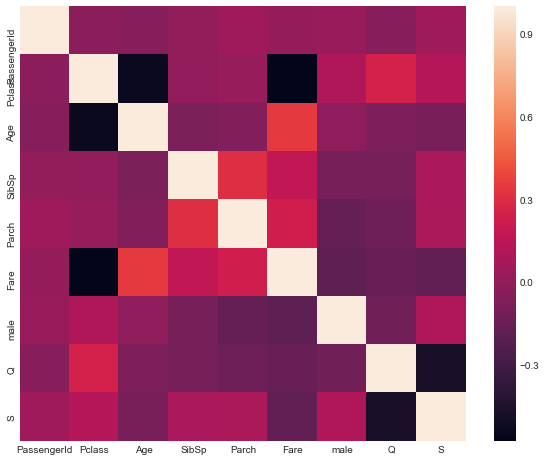

In [248]:
sb.heatmap(tData.corr())
# Age & Pclass are highly correlated, don't including in logistic regression

## Drop useless variables

In [250]:
# drop Name, Ticket, Fare, cabin, Q, S
ctData = tData.drop(['Name', 'Ticket', 'Fare', 'Q', 'S'], 1)
ctData.head()

,PassengerId,Pclass,Age,SibSp,Parch,male
0,892,3,34.5,0,0,1
1,893,3,47.0,1,0,0
2,894,2,62.0,0,0,1
3,895,3,27.0,0,0,1
4,896,3,22.0,1,1,0


In [251]:
ctData.isnull().any()

PassengerId    False
Pclass         False
Age            False
SibSp          False
Parch          False
male           False
dtype: bool

In [252]:
ctData.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
male           0
dtype: int64

In [253]:
ctrData = trData.drop(['Survived','Name', 'Ticket', 'Fare','Q', 'S'], 1)
ctrData.head()


,PassengerId,Pclass,Age,SibSp,Parch,male
0,1,3,22.0,1,0,1
1,2,1,38.0,1,0,0
2,3,3,26.0,0,0,0
3,4,1,35.0,1,0,0
4,5,3,35.0,0,0,1


In [254]:
ctrData.isnull().any()

PassengerId    False
Pclass         False
Age            False
SibSp          False
Parch          False
male           False
dtype: bool

### Same Length

In [255]:
# Get ctrData to be the same length as ctData 
len(ctData) == len(ctrData)

False

In [256]:
len(ctData)

418

In [257]:
len(ctrData)

891

In [42]:
# First make a copy so you don't lose info 
practice = ctrData.copy(deep=True)

In [43]:
practice.head(5)
# len(practice)

,PassengerId,Pclass,Age,SibSp,Parch,male
0,1,3,22.0,1,0,1
1,2,1,38.0,1,0,0
2,3,3,26.0,0,0,0
3,4,1,35.0,1,0,0
4,5,3,35.0,0,0,1


In [44]:
chop = practice[0:418:]
chop 
len(chop)

418

In [45]:
len(ctData) == len(chop)

False

In [258]:
# Apply to real dataset 
adjctrData = ctrData[0:418:]

In [260]:
# check length 
len(ctData) == len(adjctrData)

True

In [261]:
# Check to see if it all looks good!
ctData.head()

,PassengerId,Pclass,Age,SibSp,Parch,male
0,892,3,34.5,0,0,1
1,893,3,47.0,1,0,0
2,894,2,62.0,0,0,1
3,895,3,27.0,0,0,1
4,896,3,22.0,1,1,0


In [262]:
adjctrData.head()

,PassengerId,Pclass,Age,SibSp,Parch,male
0,1,3,22.0,1,0,1
1,2,1,38.0,1,0,0
2,3,3,26.0,0,0,0
3,4,1,35.0,1,0,0
4,5,3,35.0,0,0,1


## Export to work with decision trees instead in R

In [265]:
# test dataset - export without index
ctData.to_csv('C:\\Users\\loret\\Desktop\\DataSciencePrep\\Kaggle\\Titanic\\cltest.csv', index=False)

In [266]:
adjctrData.to_csv('C:\\Users\\loret\\Desktop\\DataSciencePrep\\Kaggle\\Titanic\\cltrain.csv', index=False)

## Prediction with Naive Bayes - GaussianNB

In [49]:
# x = test dataset; y = train
X = ctData
Y = fctrData 


In [50]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
PassengerId    418 non-null float64
Pclass         418 non-null float64
Age            418 non-null float64
SibSp          418 non-null float64
Parch          418 non-null float64
male           891 non-null uint8
dtypes: float64(5), uint8(1)
memory usage: 35.8 KB


In [51]:
print(X, Y)

     PassengerId  Pclass   Age  SibSp  Parch  male
0          892.0     3.0  34.5    0.0    0.0     1
1          893.0     3.0  47.0    1.0    0.0     0
2          894.0     2.0  62.0    0.0    0.0     0
3          895.0     3.0  27.0    0.0    0.0     0
4          896.0     3.0  22.0    1.0    1.0     1
5          897.0     3.0  14.0    0.0    0.0     1
6          898.0     3.0  30.0    0.0    0.0     1
7          899.0     2.0  26.0    1.0    1.0     1
8          900.0     3.0  18.0    0.0    0.0     0
9          901.0     3.0  21.0    2.0    0.0     0
10         902.0     3.0  24.0    0.0    0.0     0
11         903.0     1.0  46.0    0.0    0.0     0
12         904.0     1.0  23.0    1.0    0.0     1
13         905.0     2.0  63.0    1.0    0.0     1
14         906.0     1.0  47.0    1.0    0.0     0
15         907.0     2.0  24.0    1.0    0.0     0
16         908.0     2.0  35.0    0.0    0.0     1
17         909.0     3.0  21.0    0.0    0.0     1
18         910.0     3.0  27.0 

In [52]:
clf = GaussianNB()

In [53]:
clf.fit(X, Y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
clf_pf = GaussianNB()

In [54]:
clf_pf.partial_fit(X, Y, np.unique(Y))

NameError: name 'clf_pf' is not defined